# Multi-Layer- Perceptron Algorithm

## Load the Data

In [38]:
import pandas as pd
import ast

# Load training data
train_data = pd.read_csv('train_data.csv')
X_train_raw = train_data['X_train'].tolist()
y_train_raw = train_data['y_train'].tolist()

# Load test data
test_data = pd.read_csv('test_data.csv')
X_test_raw = test_data['X_test'].tolist()
y_test_raw = test_data['y_test'].tolist()

#Make it a list
X_train_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_train_raw]
X_test_raw = [ast.literal_eval(item) if isinstance(item, str) else item for item in X_test_raw]



## Vectorize your data and Encode Labels

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer


# Join into one big string
corpus_train = [' '.join(item) for item in X_train_raw]
corpus_test = [' '.join(item) for item in X_test_raw]


# # Initialize a TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=1000)
# X_train = vectorizer.fit_transform(corpus_train).toarray()
# X_test = vectorizer.fit_transform(corpus_test).toarray()


# Initialize the CountVectorizer, limiting max_features to the top 1000 words.
vectorizer = CountVectorizer(max_features=1000) 

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
X_train = vectorizer.fit_transform(corpus_train).toarray()
X_test = vectorizer.transform(corpus_test).toarray()

# Encode the taget variables
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train_raw)
y_test = encoder.fit_transform(y_test_raw)


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
from keras.regularizers import l2


model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')
])

model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(len(set(y_train)), activation='softmax')
])

model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(len(set(y_train)), activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history_3 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.8261 - loss: 0.4632 - val_accuracy: 0.8629 - val_loss: 0.3218
Epoch 2/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8763 - loss: 0.2884 - val_accuracy: 0.8688 - val_loss: 0.3133
Epoch 3/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8923 - loss: 0.2375 - val_accuracy: 0.8664 - val_loss: 0.3271
Epoch 4/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9084 - loss: 0.1930 - val_accuracy: 0.8639 - val_loss: 0.3787
Epoch 5/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9191 - loss: 0.1628 - val_accuracy: 0.8622 - val_loss: 0.4320
Epoch 6/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9258 - loss: 0.1418 - val_accuracy: 0.8593 - val_loss: 0.5188
Epoch 7/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9305 - loss: 0.1310 - val_accuracy: 0.8554 - val_loss: 0.5829
Epoch 8/10
8337/8337 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9335 - loss: 0

In [43]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test data
loss_model_1 = model_1.evaluate(X_test, y_test)
loss_model_2 = model_2.evaluate(X_test, y_test)
loss_model_3 = model_3.evaluate(X_test, y_test)


# # Predict classes
y_pred_1 = model_1.predict(X_test, batch_size=32)
y_pred_2 = model_2.predict(X_test, batch_size=32)
y_pred_3 = model_3.predict(X_test, batch_size=32)

# Transform into a numpy array 
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)
y_pred_classes_3 = np.argmax(y_pred_3, axis=1)

# Get the accuracy
accuracy_model_1 = accuracy_score(y_test, y_pred_classes_1)
accuracy_model_2 = accuracy_score(y_test, y_pred_classes_2)
accuracy_model_3 = accuracy_score(y_test, y_pred_classes_3)

# Print the accuracy 
print(f'Test Accuracy: {accuracy_model_1*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_2*100:.2f}%')
print(f'Test Accuracy: {accuracy_model_3*100:.2f}%')

# # Print classification report
print('Model 1 Classification Report')
print(classification_report(y_test, y_pred_classes_1))

print('\nModel 2 Classification Report')
print(classification_report(y_test, y_pred_classes_2))

print('\nModel 3 Classification Report')
print(classification_report(y_test, y_pred_classes_3))


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8516 - loss: 0.7524
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8629 - loss: 0.3704
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8639 - loss: 0.3703
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 741us/step
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step
2606/2606 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step
Test Accuracy: 85.07%
Test Accuracy: 86.23%
Test Accuracy: 86.27%
Model 1 Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     24249
           1       0.84      0.93      0.88     28191
           2       0.86      0.62      0.72      6980
           3       0.88      0.77      0.82     11449
           4       0.82      0.74      0.78      9532
           5       0.64      0.84      0.72      2961

    accuracy                           0.85     83362
   macro avg       0.82      0.80      0.80     83362
weighted avg       0.85      0.85      0.85     

## Display the Loss

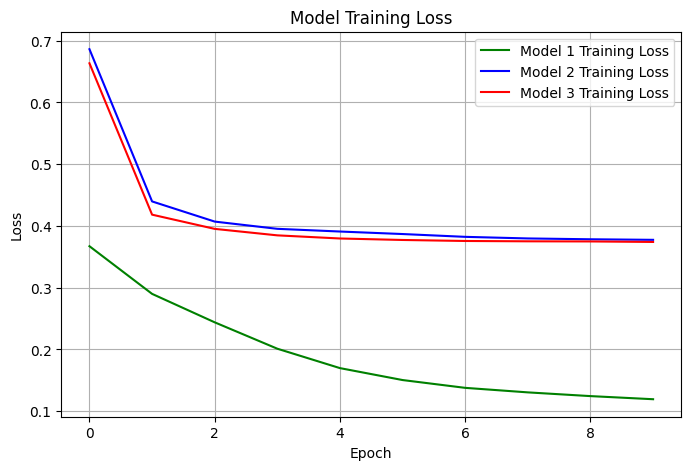

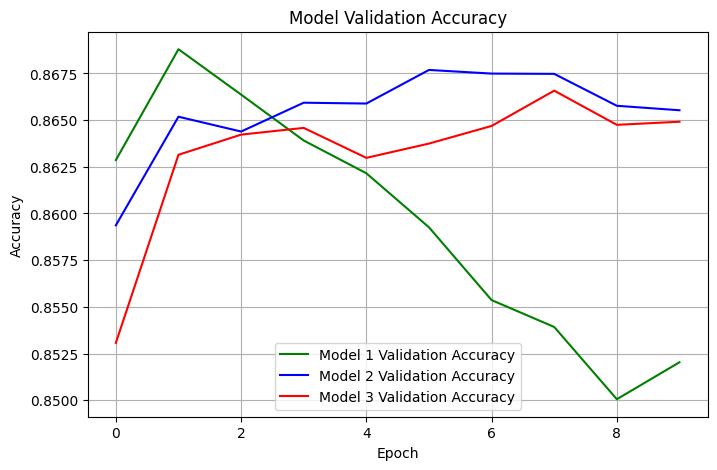

In [44]:
import matplotlib.pyplot as plt

# Plotting validation loss
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['loss'], label='Model 1 Training Loss', color='green')
plt.plot(history_2.history['loss'], label='Model 2 Training Loss' ,color='blue')
plt.plot(history_3.history['loss'], label='Model 3 Training Loss', color='red')
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['val_accuracy'], label='Model 1 Validation Accuracy', color='green')
plt.plot(history_2.history['val_accuracy'], label='Model 2 Validation Accuracy', color='blue')
plt.plot(history_3.history['val_accuracy'], label='Model 3 Validation Accuracy', color='red')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Compare the Models Against the Baseline

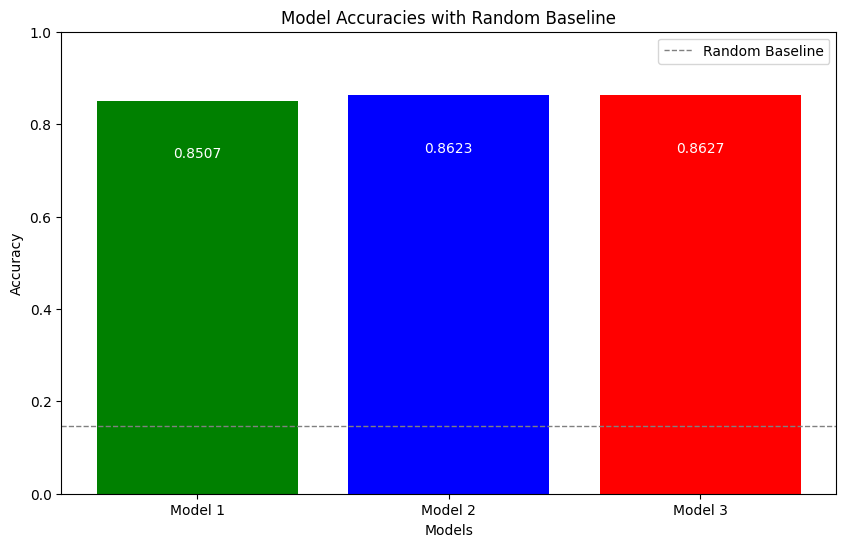

In [46]:

# Random Baseline Calculated by picking a random class
random_baseline = 0.1458


model_names = ['Model 1', 'Model 2', 'Model 3']
accuracies = [accuracy_model_1, accuracy_model_2, accuracy_model_3]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['green', 'blue', 'red'])

# Add the random baseline
plt.axhline(y=random_baseline, color='grey', linestyle='--', linewidth=1, label='Random Baseline')
plt.ylim(0, 1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.1, f'{yval:.4f}', ha='center', va='top', color='white')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies with Random Baseline')
plt.legend()
plt.show()

## Model Summaries

In [ ]:

print("Model 1 Summary:")
model_1.summary()


print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

Model 1 Summary:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,056,148 (7.84 MB)

 Trainable params: 685,382 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,370,766 (5.23 MB)


Model 2 Summary:


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,936,148 (7.39 MB)

 Trainable params: 645,382 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,290,766 (4.92 MB)


Model 3 Summary:


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,056,148 (7.84 MB)

 Trainable params: 685,382 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,370,766 (5.23 MB)